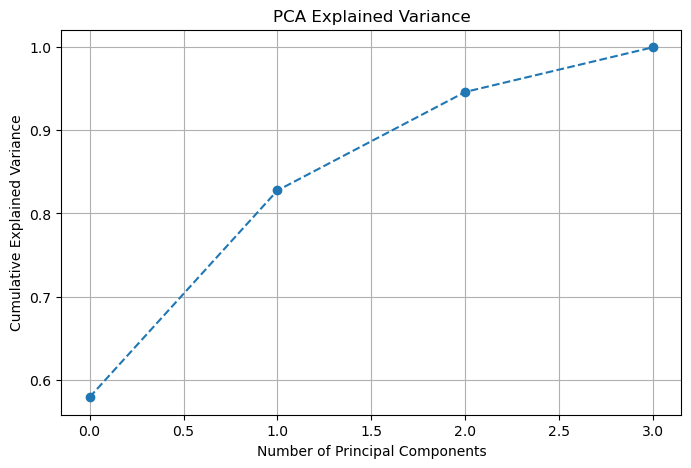

Number of Principal Components Selected: 4
SVR Linear Kernel (Optimized)
Mean Absolute Error: 47.162763451234554
Root Mean Squared Error: 74.37336362197627
R2 Score: 0.7398101666037902


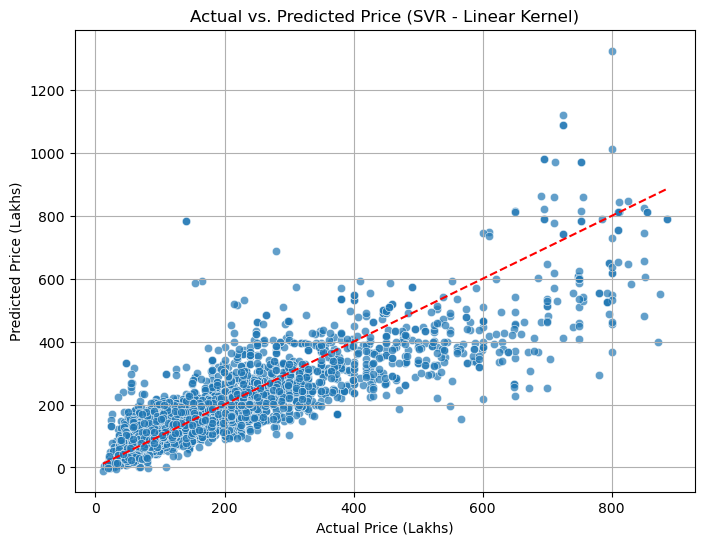

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('Cleared_Quickr.csv')

df.drop(columns=["Unnamed: 0"], inplace=True)

# Improved Outlier Removal using Z-score method
from scipy.stats import zscore
df = df[(np.abs(zscore(df["Price (Lakhs)"])) < 3)]  # Keep values within 3 standard deviations


X = df.drop(columns=["Price (Lakhs)"])
y = df["Price (Lakhs)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

print(f"Number of Principal Components Selected: {X_pca.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


svr_model = SVR(kernel='linear', C=100, epsilon=0.1)  
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print("SVR Linear Kernel (Optimized)")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.7)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Price (SVR - Linear Kernel)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.grid()
plt.show()


In [7]:
df.shape

(22471, 5)

In [43]:
svr_model.score(X_test,y_test)

0.7398101666037902

In [8]:
df.describe()

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
count,22471.000000,22471.000000,22471.000000,22471.000000,22471.000000
mean,2.775310,2.517378,1756.617374,181.009644,972.018869
std,0.734809,0.923678,909.579971,146.105455,1225.398336
min,1.000000,1.000000,306.000000,10.500000,1.000000
25%,2.000000,2.000000,1200.000000,87.590000,88.000000
50%,3.000000,3.000000,1515.000000,135.000000,287.000000
75%,3.000000,3.000000,1950.000000,215.000000,2274.000000
max,4.000000,6.000000,12000.000000,890.000000,3435.000000


Text(0, 0.5, 'Count')

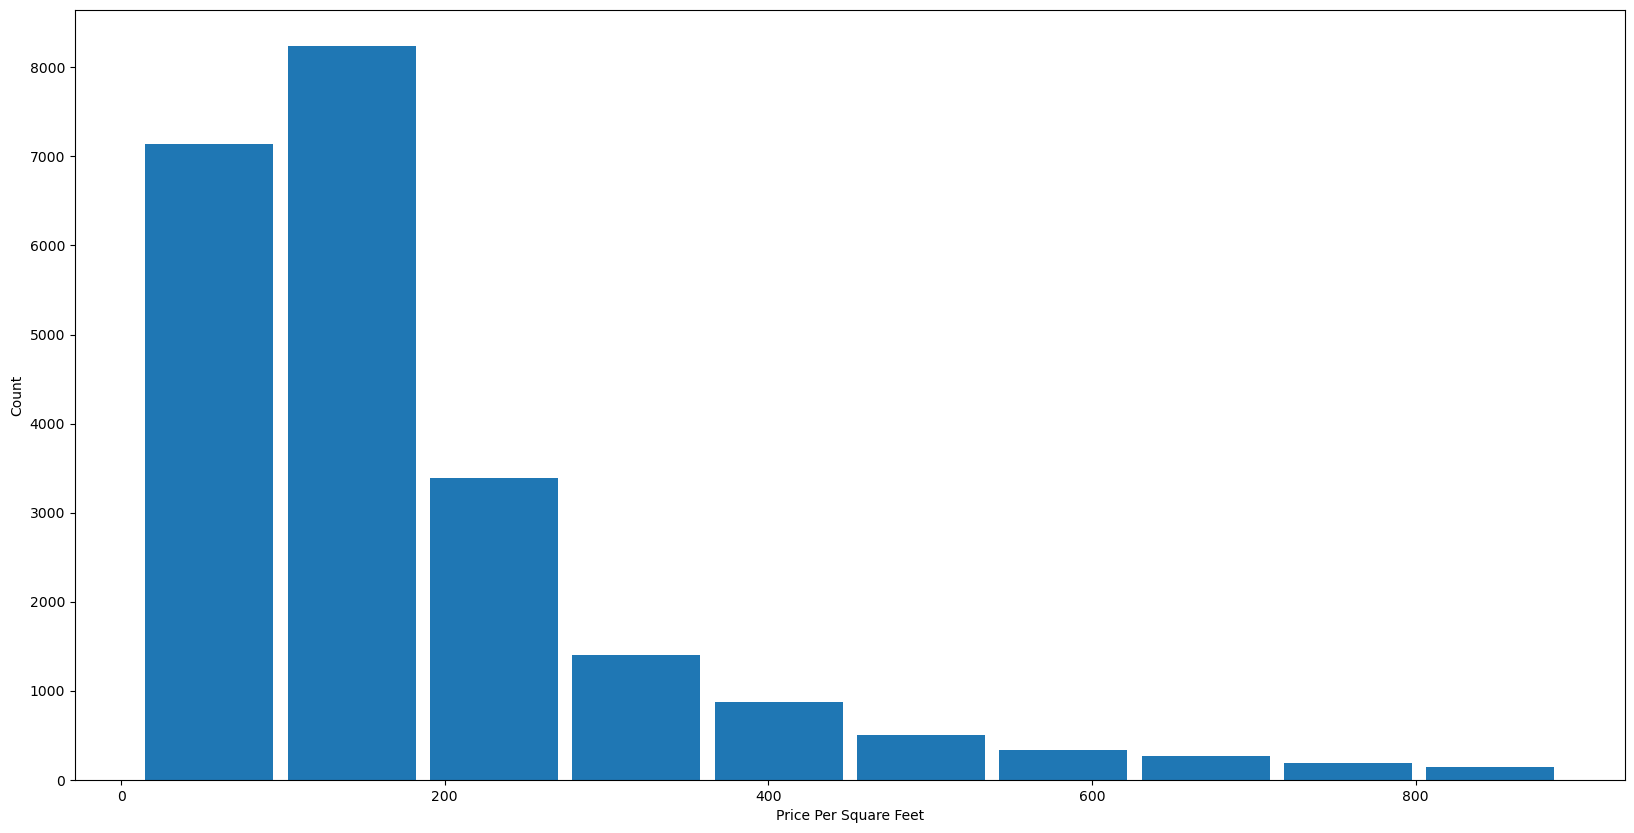

In [32]:


import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df["Price (Lakhs)"] , rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [29]:
df[df['No. of Bathrooms']>5]

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
1089,4,6,7794.0,500.0,2274
1237,4,6,3422.0,350.0,193
1259,4,6,3500.0,352.0,193
1287,4,6,3500.0,352.0,193
1358,4,6,3500.0,175.0,436
3012,4,6,2616.0,326.0,3435
3555,4,6,4000.0,440.0,813
6383,4,6,3375.0,280.0,436
8199,4,6,2700.0,330.0,2274
8413,4,6,3364.0,650.0,436


In [34]:
df[df["Price (Lakhs)"] < 1500000]

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,3,3,2036.0,245.00,193
1,2,2,1094.0,175.00,13
2,2,2,1070.0,75.00,225
3,2,2,950.0,90.00,332
4,2,2,1070.0,75.00,332
...,...,...,...,...,...
22695,3,3,1746.0,200.00,1198
22696,1,1,615.0,46.41,298
22697,3,3,1287.0,119.00,2274
22698,3,3,1600.0,214.00,3435


In [40]:
df[df["Price (Lakhs)"] < 100000]

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,3,3,2036.0,245.00,193
1,2,2,1094.0,175.00,13
2,2,2,1070.0,75.00,225
3,2,2,950.0,90.00,332
4,2,2,1070.0,75.00,332
...,...,...,...,...,...
22695,3,3,1746.0,200.00,1198
22696,1,1,615.0,46.41,298
22697,3,3,1287.0,119.00,2274
22698,3,3,1600.0,214.00,3435
